In [1]:
import pandas as pd  # import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import requests
import re
from bs4 import BeautifulSoup
warnings.filterwarnings("ignore")
%matplotlib inline

## Scrapping Data from OYO website

In [2]:
url='https://www.oyorooms.com/hotels-in-hyderabad/'
page=requests.get(url,headers = {'User-Agent':'Mozilla/5.0'})
page

<Response [200]>

In [3]:
Hotelname=[]
address=[]
currentprice=[]
actualprice=[]
discount=[]
Rating=[]
facility=[]

In [71]:
cities = ['pune','mumbai','hyderabad','bangalore','chennai','delhi','shimla','goa','manali','mahabaleshwar']
for i in cities:
    for j in range(1,10):
        url='https://www.oyorooms.com/hotels-in-{}/?page={}'.format(i,j)
        print('Getting data from page ', i)
        page = requests.get(url,headers = {'User-Agent':'Mozilla/5.0'})
        page_context = page.text
        soup = BeautifulSoup(page_context)
        for data in soup.find_all('div',attrs={'class':'oyo-row oyo-row--no-spacing listingHotelDescription'}):
            hname=data.find('h3',attrs={'class':'listingHotelDescription__hotelName d-textEllipsis'})
            addr=data.find('div',attrs={'class','d-body-lg listingHotelDescription__hotelAddress'})
            curprice=data.find('span',attrs={'class','listingPrice__finalPrice'})
            actprice=data.find('span',attrs={'class','listingPrice__slashedPrice d-body-lg'})
            dis=data.find('span',attrs={'class','listingPrice__percentage'})
            rat=data.find('div' , attrs={'class' :'hotelRating'})
            fact=data.find('div',attrs={'class':'amenityWrapper'})
            
            if hname is None:
                Hotelname.append(np.NaN)
            else:
                Hotelname.append(hname.text)
            if addr is None:
                address.append(np.NaN)
            else:
                address.append(addr.text)
            if curprice is None:
                currentprice.append(np.NaN)
            else:
                currentprice.append(curprice.text)
            if actprice is None:
                actualprice.append(np.NaN)
            else:
                actualprice.append(actprice.text)
            if dis is None:
                discount.append(np.NaN)
            else:
                discount.append(dis.text)
            if rat is None:
                Rating.append(np.NaN)
            else:
                Rating.append(rat.text)
            if fact is None:
                facility.append(np.NaN)
            else:
                facility.append(fact.text)

Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  hyderabad
Getting data from page  hyderabad
Getting data from page  hyderabad
Getting data from page  hyderabad
Getting data from page  hyderabad
Getting data from page  hyderabad
Getting data from page  hyderabad
Getting data from page  hyderabad
Getting data from page  hyderabad
Getting data from page  bangalore
Getting data from page  bangalore
Getting data from page  bangalore
Getting data from page  bangalore
Getting data from 

In [72]:
len(Hotelname)

801

In [73]:
len(address)

801

In [74]:
len(actualprice)

801

In [75]:
len(currentprice)

801

In [76]:
len(discount)

801

In [77]:
len(Rating)

801

In [78]:
len(facility)

801

# creating a dataframe named oyo

In [4]:
oyo=pd.DataFrame({'HotelName':Hotelname,'Address':address,'Originalprice':actualprice,'Amountpayable':currentprice,'Discount':discount,'Facilities':facility,'Ratings':Rating})

In [80]:
oyo.to_csv("oyo.csv")

In [5]:
oyo=pd.read_csv('oyo.csv')

In [6]:
oyo

,Unnamed: 0,HotelName,Address,Originalprice,Amountpayable,Discount,Facilities,Ratings
0,0,OYO Home 77978 Peaceful Stay Keshav Nagar,"Mundhwa, Pune· 9.8 km",₹3964,₹1110,72% off,Parking facility Private entrance Elevator ...,3.4 (1905 Ratings)·Fair
1,1,OYO 12151 The Orchid Guest House,"Near Laxmi Mata Mandir, Pune· 5.5 km",₹4202,₹1177,71% off,Hair Dryer Parking facility Free Wi-Fi + 1...,3.1 (233 Ratings)·Fair
2,2,Flagship 11545 Hotel Gargi Executive,"On main street, Near Revenue Colony, Shivaji N...",₹5965,₹1670,72% off,Parking facility Free Wi-Fi Power backup +...,2.9 (799 Ratings)·Fair
3,3,Townhouse OAK The White Castle,"Haveli, Pune· 7.3 km",₹4534,₹1270,71% off,Reception Caretaker Power backup + 24 more,3.3 (1128 Ratings)·Fair
4,4,OYO 40836 The Guest House,"Near Vadgaon Khurd, Sinhagad Road, Pune· ...",₹1947,₹453,76% off,Parking facility Reception Free Wi-Fi + 11...,3.1 (289 Ratings)·Fair
...,...,...,...,...,...,...,...,...
796,796,Collection O 703931 Hotel bright holidays,"Mahabaleshwar, Mahabaleshwar· 5.3 km",₹3531,₹1236,65% off,AC TV TV + 3 more,NEW
797,797,OYO 76721 Hotel Mk,"Satara, Mahabaleshwar· 9.3 km",₹2985,₹1045,64% off,Full Sized Bed AC TV + 3 more,3.0 (17 Ratings)·Fair
798,798,OYO Townhouse 701 Hotel Bright Plaza,"Metgutad, Mahabaleshwar· 5.9 km",₹7437,₹2603,65% off,Parking facility Reception Free Wi-Fi + 18...,3.1 (259 Ratings)·Fair
799,799,Collection O 86603 Hotel Dream Catcher,"412803, Mahabaleshwar· 17.8 km",₹2798,₹586,79% off,Reception Ticket tour assistance Caretaker ...,2.7 (5 Ratings)·Fair


# Data cleaning

### Removing unneccessary columns:

In [7]:
oyo.drop(labels="Unnamed: 0",axis=1,inplace=True)

+ Here we have dropped the Unnamed column from the dataframe using drop

In [8]:
oyo['Originalprice']=oyo['Originalprice'].apply(lambda x:str(x).replace("₹","")).astype('float')
oyo['Amountpayable']=oyo['Amountpayable'].apply(lambda x:str(x).replace("₹","")).astype('float')

+ we have dropped the '₹'symbol from both the columns "originalprice" and "amount payable" an also converted them from object type into float type

In [9]:
oyo['Discount'] = oyo.Discount.apply(lambda x:str(x).replace('% off',''))

In [10]:
oyo['Discount'] = oyo.Discount.astype('float')

+ In the Discount column we have removed '% off' and replaced them with empty space and also converted it into float type

## Creating new columns

In [11]:
regex = r'[0-9][0-9]+'
oyo['Reviews'] = oyo['Ratings'].apply(lambda x: re.compile(regex).findall(x))
oyo['Reviews'] = oyo['Reviews'].apply(lambda x: ''.join(x)) 

+ using regular expressions,from the Ratings column we created a separate column of Reviews with reviews of the hotel rooms

In [12]:
regex = r'Fair|Good|Very Good|Fabulous|Excellent|New'
oyo['Roomquality'] = oyo['Ratings'].apply(lambda x: re.compile(regex).findall(x))
oyo['Roomquality'] = oyo['Roomquality'].apply(lambda x: ''.join(x))

+ Here we created a new column named 'Roomquality' from the 'Ratings' column

In [13]:
regex = r'[0-5].+[(]'
oyo['Ratings'] = oyo['Ratings'].apply(lambda x: re.compile(regex).findall(x))
oyo['Ratings'] = oyo['Ratings'].apply(lambda x: ''.join(x))
oyo['Ratings'] = oyo['Ratings'].apply(lambda x: x.replace('(',''))

+ From the initial 'Ratings' column we have removed all the information except Ratings of the hotel rooms

## After cleaning the DataFrame this is the dataset we got with sufficient information to analyze the data of oyo hotels

In [14]:
oyo

,HotelName,Address,Originalprice,Amountpayable,Discount,Facilities,Ratings,Reviews,Roomquality
0,OYO Home 77978 Peaceful Stay Keshav Nagar,"Mundhwa, Pune· 9.8 km",3964.0,1110.0,72.0,Parking facility Private entrance Elevator ...,3.4,1905,Fair
1,OYO 12151 The Orchid Guest House,"Near Laxmi Mata Mandir, Pune· 5.5 km",4202.0,1177.0,71.0,Hair Dryer Parking facility Free Wi-Fi + 1...,3.1,233,Fair
2,Flagship 11545 Hotel Gargi Executive,"On main street, Near Revenue Colony, Shivaji N...",5965.0,1670.0,72.0,Parking facility Free Wi-Fi Power backup +...,2.9,799,Fair
3,Townhouse OAK The White Castle,"Haveli, Pune· 7.3 km",4534.0,1270.0,71.0,Reception Caretaker Power backup + 24 more,3.3,1128,Fair
4,OYO 40836 The Guest House,"Near Vadgaon Khurd, Sinhagad Road, Pune· ...",1947.0,453.0,76.0,Parking facility Reception Free Wi-Fi + 11...,3.1,289,Fair
...,...,...,...,...,...,...,...,...,...
796,Collection O 703931 Hotel bright holidays,"Mahabaleshwar, Mahabaleshwar· 5.3 km",3531.0,1236.0,65.0,AC TV TV + 3 more,,,
797,OYO 76721 Hotel Mk,"Satara, Mahabaleshwar· 9.3 km",2985.0,1045.0,64.0,Full Sized Bed AC TV + 3 more,3.0,17,Fair
798,OYO Townhouse 701 Hotel Bright Plaza,"Metgutad, Mahabaleshwar· 5.9 km",7437.0,2603.0,65.0,Parking facility Reception Free Wi-Fi + 18...,3.1,259,Fair
799,Collection O 86603 Hotel Dream Catcher,"412803, Mahabaleshwar· 17.8 km",2798.0,586.0,79.0,Reception Ticket tour assistance Caretaker ...,2.7,,Fair


In [15]:
re_address = r"(Bangalore|Banglore|Bengaluru|chennai|Chennai|mumbai|Mumbai|goa|Goa|delhi|Delhi|hyderabad|Hyderabad|pune|Pune|bangalore|Shimla|shimla|Mahabaleshwar|mahabaleshwar|Manali|manali)"
oyo["Location"]= oyo["Address"].apply(lambda x:re.search(re_address,x).group().lower() if re.search(re_address,x) else np.NaN)
oyo.Location.fillna("missing").value_counts() 

bangalore        142
delhi            138
hyderabad        130
chennai           66
missing           65
goa               65
mumbai            61
pune              44
manali            39
shimla            35
mahabaleshwar     11
bengaluru          5
Name: Location, dtype: int64

+ from the 'Address' column we have created a 'Location' column with all the cities names where the hotels are situated

In [16]:
oyo.head(1)

,HotelName,Address,Originalprice,Amountpayable,Discount,Facilities,Ratings,Reviews,Roomquality,Location
0,OYO Home 77978 Peaceful Stay Keshav Nagar,"Mundhwa, Pune· 9.8 km",3964.0,1110.0,72.0,Parking facility Private entrance Elevator ...,3.4,1905,Fair,pune


In [17]:
oyo['Location'].isnull().sum()

65

+ replacing diffrently spelled place names with one place name for better analysis

In [18]:
oyo["Location"].replace({'karnataka':"bangalore",'bengaluru':"bangalore",'bengaluru':"bangalore",'indiranagar':"bangalore",'banglore':"bangalore",'hebbal':'bangalore'}, inplace = True)

In [19]:
oyo["Location"].replace({'Mahabaleshwar':"mahabaleshwar"}, inplace = True)

In [20]:
oyo.Location.fillna("missing").value_counts()

bangalore        147
delhi            138
hyderabad        130
chennai           66
missing           65
goa               65
mumbai            61
pune              44
manali            39
shimla            35
mahabaleshwar     11
Name: Location, dtype: int64

+ In the 'Location' column we have many Null values so we are filling them with 'missing'

In [21]:
filt = oyo.Location.isna()

In [22]:
oyo.loc[filt]["Address"].values

array(['Near Shree Control Chowk, Dhayari,·       9.2 km',
       'Near J M Road, Shivajinagar·       0.8 km',
       'Near Bus Stand, Phoenix Marketcity, Somnath Nagar Road, Viman Nagar·       8.0 km',
       'Near J M Road, Shivajinagar·       0.8 km',
       '9A Rajkutir, 3rd Road,next to Doolally Taproom,next to Khar railway station, Khar West·       4.0 km',
       'Near Aarey Colony, Goregaon·       8.6 km',
       'Marol military road opposite mangla hospital andheri east ·       5.3 km',
       'hop No 39 Shivaji Market, CG Rd, opposite Krishna Restaurant, Chembur Colony·       3.9 km',
       'Behind OZONE Hospital·       6.9 km',
       'Behind OZONE Hospital·       6.9 km',
       'Erragadda Metro Station·       9.8 km',
       'Near RP Road BUS STOP·       5.7 km',
       'Shop No. 10-4-A/130/2, Addagutta Road, Teachers Colony, East Marredpally·       7.0 km',
       'Above Vishal Mega mart·       8.3 km',
       'Behind Baptist Hospital, Hebbal·       7.2 km',
       'Near

In [23]:
oyo.shape

(801, 10)

In [24]:
oyo.dropna(subset = ['Location'], inplace = True) #dropping rows where no proper city name is not mentioned

In [25]:
oyo.shape

(736, 10)

+ From the above dataset after removing the missing values the Dataset of length 801 rows and 10 columns is deducted to 736 rows and 10 columns 

In [26]:
oyo["Reviews"]= pd.to_numeric(oyo["Reviews"], errors='coerce')

In [27]:
oyo["Ratings"] = pd.to_numeric(oyo["Ratings"], errors='coerce')

## searching for Null value count

In [28]:
oyo.isnull().sum()

HotelName          0
Address            0
Originalprice    164
Amountpayable    164
Discount         164
Facilities         3
Ratings           74
Reviews           97
Roomquality        0
Location           0
dtype: int64

+ From the above DataFrame we can see that there are a lot of Null values in the dataset

# Data cleaning

In [29]:
oyo["Originalprice"].fillna(oyo["Originalprice"].median(),inplace=True)

+ In the 'Originalprice' column we filled the Null values with median of that data  

In [30]:
oyo["Amountpayable"].fillna(oyo["Amountpayable"].median(),inplace=True)

+ In the above 'Amountpayable' column i have filled the null value with median of that data

In [31]:
oyo["Discount"].fillna(oyo["Discount"].median(),inplace=True)
oyo["Ratings"].fillna(oyo["Ratings"].median(),inplace=True)
oyo["Reviews"].fillna(oyo["Reviews"].median(),inplace=True)

+ In the above cells I have filled the missing values with the median of the particular column values 

In [32]:
oyo["Facilities"]=oyo["Facilities"].apply(lambda x:str(x).replace('nan',"No Facilities"))

In [33]:
oyo.isnull().sum()

HotelName        0
Address          0
Originalprice    0
Amountpayable    0
Discount         0
Facilities       0
Ratings          0
Reviews          0
Roomquality      0
Location         0
dtype: int64

In [34]:
oyohotel=pd.DataFrame(oyo)

In [35]:
oyohotel

,HotelName,Address,Originalprice,Amountpayable,Discount,Facilities,Ratings,Reviews,Roomquality,Location
0,OYO Home 77978 Peaceful Stay Keshav Nagar,"Mundhwa, Pune· 9.8 km",3964.0,1110.0,72.0,Parking facility Private entrance Elevator ...,3.4,1905.0,Fair,pune
1,OYO 12151 The Orchid Guest House,"Near Laxmi Mata Mandir, Pune· 5.5 km",4202.0,1177.0,71.0,Hair Dryer Parking facility Free Wi-Fi + 1...,3.1,233.0,Fair,pune
2,Flagship 11545 Hotel Gargi Executive,"On main street, Near Revenue Colony, Shivaji N...",5965.0,1670.0,72.0,Parking facility Free Wi-Fi Power backup +...,2.9,799.0,Fair,pune
3,Townhouse OAK The White Castle,"Haveli, Pune· 7.3 km",4534.0,1270.0,71.0,Reception Caretaker Power backup + 24 more,3.3,1128.0,Fair,pune
4,OYO 40836 The Guest House,"Near Vadgaon Khurd, Sinhagad Road, Pune· ...",1947.0,453.0,76.0,Parking facility Reception Free Wi-Fi + 11...,3.1,289.0,Fair,pune
...,...,...,...,...,...,...,...,...,...,...
796,Collection O 703931 Hotel bright holidays,"Mahabaleshwar, Mahabaleshwar· 5.3 km",3531.0,1236.0,65.0,AC TV TV + 3 more,3.6,509.0,,mahabaleshwar
797,OYO 76721 Hotel Mk,"Satara, Mahabaleshwar· 9.3 km",2985.0,1045.0,64.0,Full Sized Bed AC TV + 3 more,3.0,17.0,Fair,mahabaleshwar
798,OYO Townhouse 701 Hotel Bright Plaza,"Metgutad, Mahabaleshwar· 5.9 km",7437.0,2603.0,65.0,Parking facility Reception Free Wi-Fi + 18...,3.1,259.0,Fair,mahabaleshwar
799,Collection O 86603 Hotel Dream Catcher,"412803, Mahabaleshwar· 17.8 km",2798.0,586.0,79.0,Reception Ticket tour assistance Caretaker ...,2.7,509.0,Fair,mahabaleshwar


In [36]:
oyo.describe()

,Originalprice,Amountpayable,Discount,Ratings,Reviews
count,736.000000,736.000000,736.000000,736.000000,736.000000
mean,3883.777174,1148.440217,70.017663,3.541712,757.301630
std,1553.241676,496.912855,4.485619,0.603515,828.704181
min,820.000000,238.000000,29.000000,1.000000,10.000000
25%,2864.250000,860.750000,69.000000,3.200000,186.000000
50%,3674.500000,1063.000000,71.000000,3.600000,509.000000
75%,4425.000000,1270.250000,72.000000,3.900000,1040.750000
max,11768.000000,3568.000000,93.000000,5.000000,5500.000000


# Go for Group by to check rent by location

In [37]:
oyo.groupby(by=['Location'])['Amountpayable'].agg(np.mean)


Location
bangalore        1165.435374
chennai          1001.015152
delhi            1006.891304
goa              1724.584615
hyderabad        1026.053846
mahabaleshwar    1075.909091
manali            811.128205
mumbai           1528.918033
pune             1071.295455
shimla           1130.285714
Name: Amountpayable, dtype: float64

+ Inference
+ by seeing the above data we can say the rent of hotels in GOA ,MUMBAI is higher than other cities.

# Data visualisation

# Univariate analysis

### Checking the most payed amount for every hotel

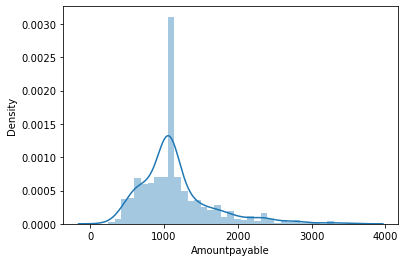

In [38]:
sns.distplot(oyo['Amountpayable']);

+ In the above graph we can clearly see that the prices(Amount payable) of the hotel room which are having 1000+ are having more density in the graph, so we can say thet almost maximum hotels have the price 1000+ per night

# Getting the data of city wise hotel count :

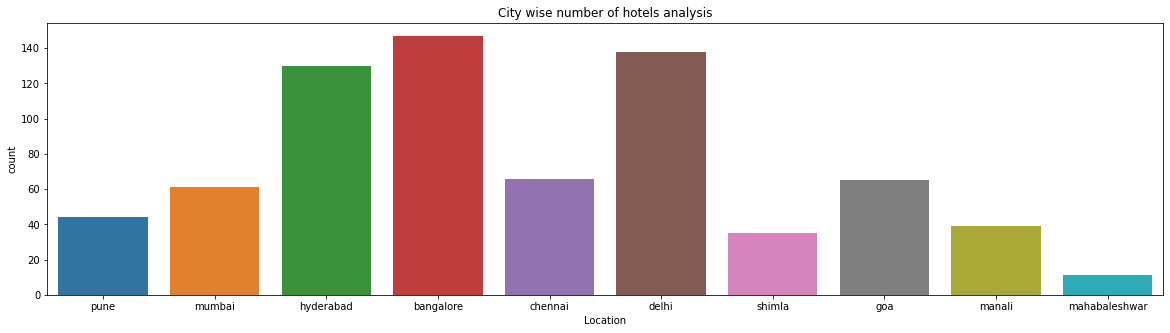

In [40]:
sns.countplot(oyo['Location'])
plt.rcParams['figure.figsize'] = (20,10)
plt.title('City wise number of hotels analysis')
plt.show()

+ inference
+  From The above data we can observe that the hotels count in  bangaore,delhi are more than other cities.

## Checking Discount for all dataset

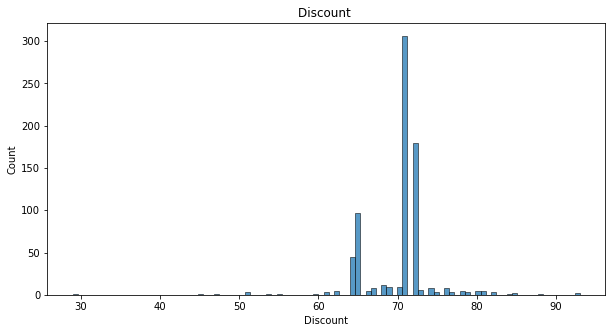

In [39]:
size = (10,5)
fig, ax = plt.subplots(figsize=size)
plt.title('Discount ')
sns.histplot(data=oyo, x=oyo['Discount'])
plt.show()

##### by seeing above data we can say that there are maximum hotels providing 71% discount

## Searching for maximum rating of hotels

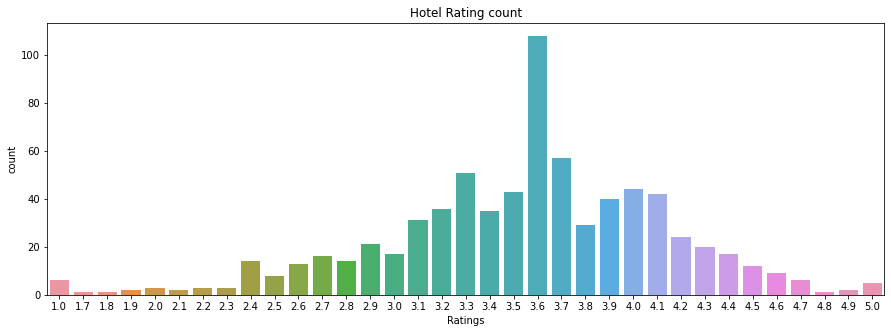

In [40]:
size = (15, 5)
fig, ax = plt.subplots(figsize=size)
plt.title('Hotel Rating count')
sns.countplot(data=oyo, x=oyo['Ratings'])
plt.show()

##### by seeing above data we can say that there are maximum hotels having rating 3.6 rating .

## Checking for rent distribution of Hotels

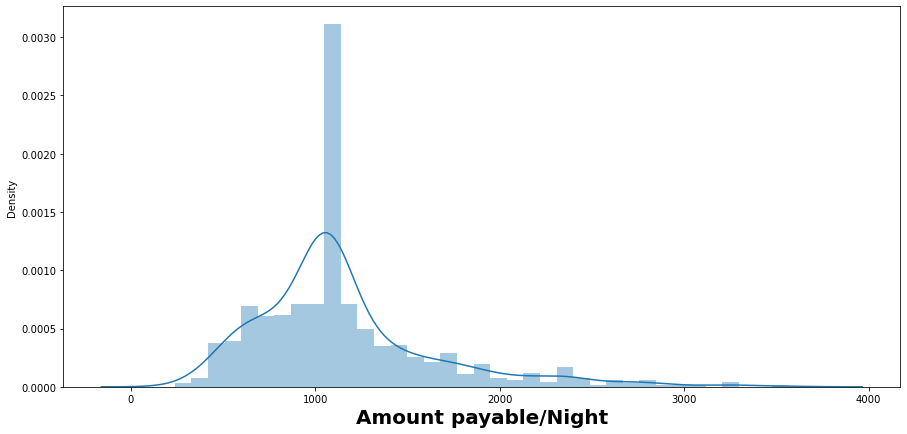

In [41]:
fig = plt.figure(figsize=(15,7))
sns.distplot(oyo.Amountpayable)
plt.xlabel('Amount payable/Night', fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

+ Inference:
+ maximum hotel rent lies around 1000 or approximately between 700 to 1500
+ highest rent is approx 4000.
+ minimum hotels having rent between 2000 to 3200.

# Bivariate Analysis

## Checking the Discount rate of each city

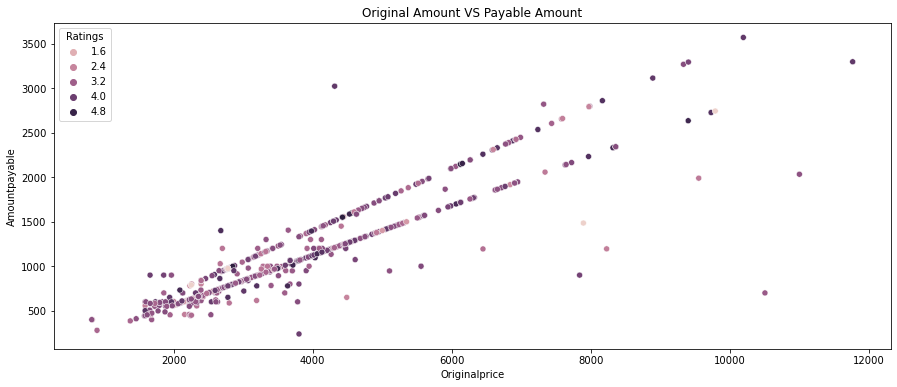

In [41]:
size = (15, 6)
fig, ax = plt.subplots(figsize=size)
plt.title('Original Amount VS Payable Amount')
sns.scatterplot(data=oyo,x=oyo['Originalprice'], y=oyo['Amountpayable'], hue=oyo['Ratings'])
plt.show()


+ inference:
+ original rent is high , Amount Payble per night is high
+ one outlier whose original rent is 12000 bt amount to pay is 3500 with 4 star rating , it seems that it gives 70% discount
+ again outlier whose original rent is approx 11000 bt its amount payable per night is 2000 with 3 star rating
+ Maximun hotels whose original rent is lies between 2000 to 7000 its discounted rent is in between 700 to 2500.


## Getting the no. of hotels having highest Rent from Dataset

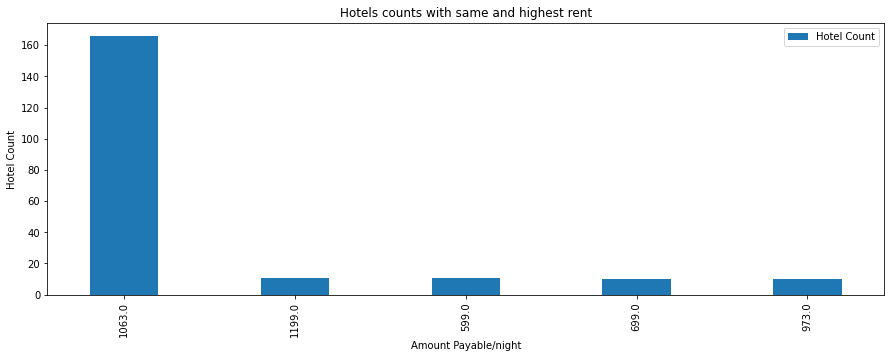

In [43]:
plt.ylabel('Hotel Count')
plt.xlabel('Amount Payable/night')
plt.title('Hotels counts with same and highest rent')
oyo['Amountpayable'].value_counts().nlargest(5).plot(kind='bar',figsize= (15,5),width = 0.4) 
plt.legend(["Hotel Count"])
plt.show()

+ There are 160+ Hotels having the hotels rents upto ₹1063 per night
+ And the minimum number of hotels are charging less than ₹1000 per night

## Plotting the data of Discount and rating to see the dependies if any and the discount rate

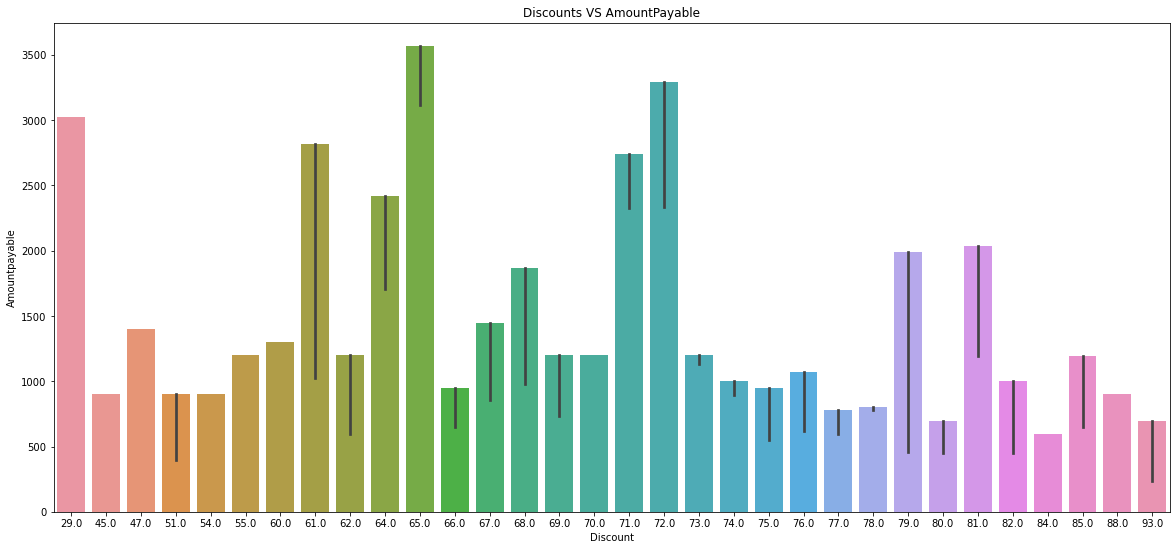

In [44]:
size = (20, 9)
fig, ax = plt.subplots(figsize=size)
plt.title('Discounts VS AmountPayable')
sns.barplot(data=oyo,x=oyo['Discount'], y=oyo['Amountpayable'], estimator=np.max)
plt.show()

+ Inference
+ for highest rent there is 65% discount
+ for least rent there is 84 % discount
+ Maximum rent  lies between 1000 to 3500
+ only one hotel is there , of rent 3500.

##### by seeing above data we can say that there are maximum hotels providing 65% discount

## Bivariate plot for rent vs Quality

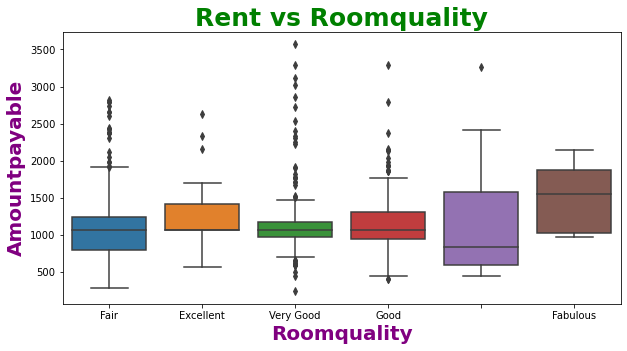

In [45]:
fig = plt.figure(figsize=(10,5))
plt.ylabel('Amountpayable', fontdict={'fontsize':20,'fontweight':'bold', 'color':'purple'})
plt.xlabel('Roomquality',fontdict={'fontsize':20,'fontweight':'bold', 'color':'purple'})
plt.title('Rent vs Roomquality',fontdict={'fontsize':25,'fontweight':'bold', 'color':'green'})
sns.boxplot(x='Roomquality', y='Amountpayable', data =oyo, )
plt.show()


+ Inference:
+ From above graph it seems that rent is normally distributed as per room quality.
+ There are some outliers, in room quality(very Good) one of the hotels rent is approx 3500+.
+ Some hotels seems new having rent in between 1000 to 2000.

## Getting the data between Ratings and Roomquality of the hotels

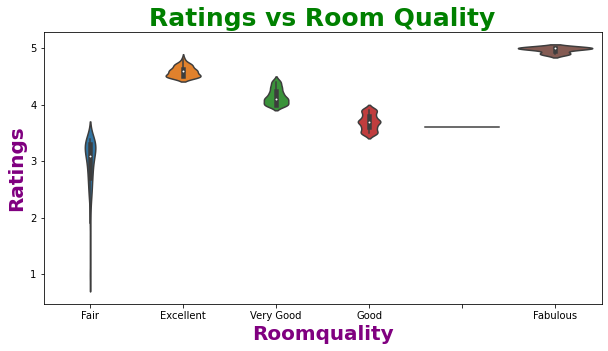

In [46]:
fig = plt.figure(figsize=(10,5))
plt.ylabel('Ratings', fontdict={'fontsize':20,'fontweight':'bold', 'color':'purple'})
plt.xlabel('Roomquality',fontdict={'fontsize':20,'fontweight':'bold', 'color':'purple'})
plt.title('Ratings vs Room Quality',fontdict={'fontsize':25,'fontweight':'bold', 'color':'green'})
sns.violinplot(x='Roomquality', y='Ratings', data =oyo, )
plt.show()

+ Inference:
+ For Fair room quality rating the outlier rating which is almost 0.
+ For Fair room quality rating is starting from 1 to 3.9 .
+ For fabulous room quality rating is starts from 4.8 to 5 stars (which is highest rating)

In [42]:
oyo["Location"].describe()

count           736
unique           10
top       bangalore
freq            147
Name: Location, dtype: object

In [43]:
oyo["Location"].value_counts()

bangalore        147
delhi            138
hyderabad        130
chennai           66
goa               65
mumbai            61
pune              44
manali            39
shimla            35
mahabaleshwar     11
Name: Location, dtype: int64

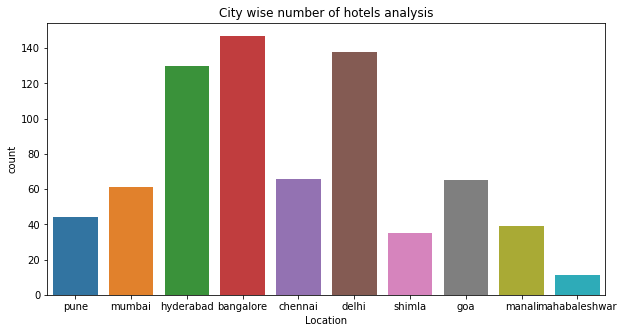

In [49]:
fig = plt.figure(figsize=(10,5))
plt.title('City wise number of hotels analysis')
sns.countplot(oyo['Location'])
plt.show()

## plotting the graph between location and roomquaity to see the cities having highest hotels with different roomqualities

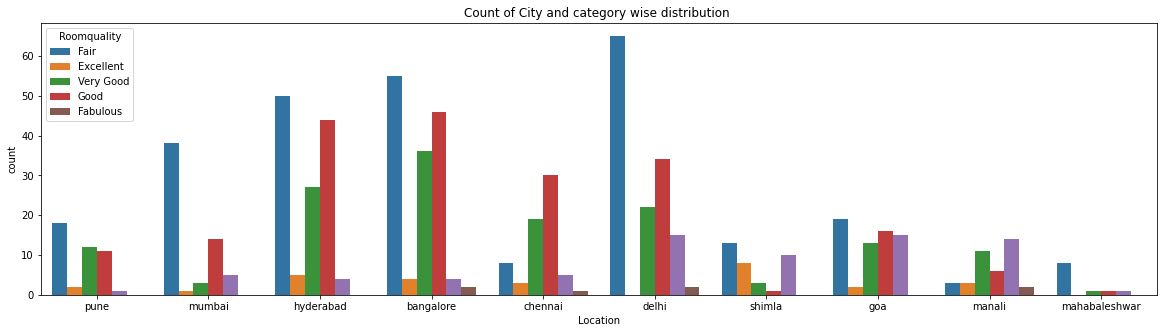

In [50]:

sns.countplot(x =oyo.Location, hue = oyo.Roomquality )
plt.rcParams['figure.figsize'] = (10,5)
plt.title('Count of City and category wise distribution ')
plt.show()

+ Fair Roomqualities- are highest in delhi and bangalore
+ Good Roomqualities- are highest in bangalore and hyderabad
+ Verygood roomqulaities are highest in bangalore and hyderabad
+ Excellent roomqualities are highest in shimla
+ Fabulous roomqualities are highest in manali
+ New rooms are highest in manali

## Plotting the graph between Ratings and Amountpayable per night of hotel rooms

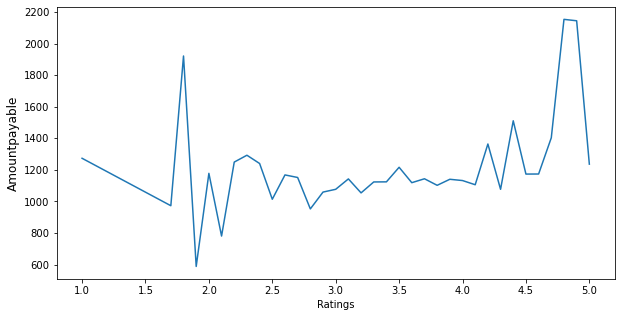

In [51]:
oyo.groupby(["Ratings"])["Amountpayable"].mean().plot.line()
plt.ylabel('Amountpayable', fontdict={'fontsize':12, 'color':'black'})
plt.show()

+ some low rated hotels are high priced
+ price of hotels increase with rating between 2 to 4.7
+ some high rated hotels are priced less

# Multivariate Analysis

In [44]:
oyo["Roomquality"].value_counts()

Fair         277
Good         203
Very Good    147
              74
Excellent     28
Fabulous       7
Name: Roomquality, dtype: int64

In [45]:
oyo["Roomquality"].isnull().sum()

0

In [46]:
oyo["Roomquality"].fillna(oyo["Roomquality"].mode()[0], inplace = True)

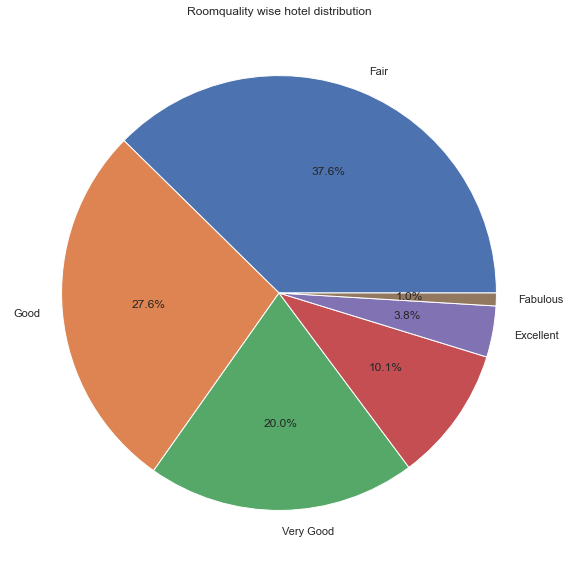

In [63]:
plt.pie(oyo["Roomquality"].value_counts(),labels = oyo["Roomquality"].value_counts().index,autopct = '%1.1f%%')
sns.set(rc={'figure.figsize':(20,15)})
plt.title('Roomquality wise hotel distribution')
plt.show()

+ In total of the hotels present there are 27.6% of hotels are with Good Roomquality
+ The maximum number of hotels i.e 37.6% of hotels have Fair roomquality
+ There are 20.0% of hotel rooms have very Good roomquality
+ There are only 3.8% of hotels have Excellent roomquality
+ There are only 1.0% of hotels have fabulous roomqualities


In [47]:
cormat=oyo.corr()

In [48]:
cormat

,Originalprice,Amountpayable,Discount,Ratings,Reviews
Originalprice,1.000000,0.903613,0.055409,0.048947,0.075866
Amountpayable,0.903613,1.000000,-0.319474,0.073457,0.073428
Discount,0.055409,-0.319474,1.000000,-0.041534,0.029306
Ratings,0.048947,0.073457,-0.041534,1.000000,0.303009
Reviews,0.075866,0.073428,0.029306,0.303009,1.000000


# Multivariate Analysis

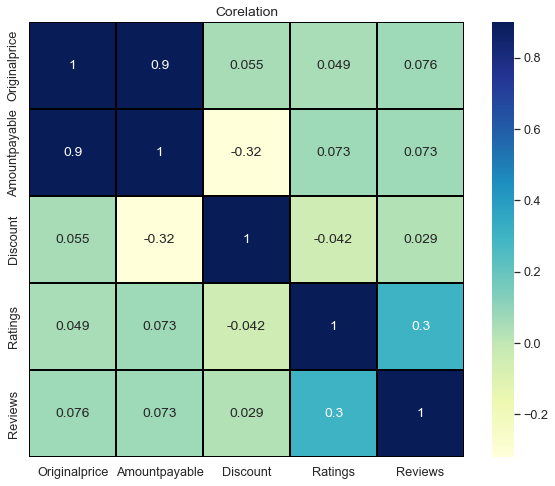

In [66]:
sns.set(font_scale=1.15)
plt.figure(figsize=(10,8))
sns.heatmap(cormat, vmax=0.9, linewidths=0.02,
 square=True,
 annot=True,
 cmap='YlGnBu',
 linecolor="black")
plt.title('Corelation')
plt.show()


In [80]:
pune = oyo[(oyo['Location']=='Pune')]
mumbai = oyo[(oyo['Location']=='Mumbai')]
hyderabad = oyo[(oyo['Location']=='Hyderabad')]
bangalore = oyo[(oyo['Location']=='Bangalore')]
chennai = oyo[(oyo['Location']=='Chennai')]
delhi = oyo[(oyo['Location']=='Delhi')]
shimla = oyo[(oyo['Location']=='Shimla')]
goa = oyo[(oyo['Location']=='Goa')]
manali = oyo[(oyo['Location']=='Manali')]
mahabaleshwar = oyo[(oyo['Location']=='Mahabaleshwar')]

### Performing some operation to analyse the data more

In [49]:
oyo[(oyo['Ratings']>4.5)&(oyo['Roomquality']== 'Excellent') & (oyo['Reviews']>500)]

,HotelName,Address,Originalprice,Amountpayable,Discount,Facilities,Ratings,Reviews,Roomquality,Location
6,OYO 17036 Rk's Regency,"Near Dhayari Phata, Wadgaon Budruk, Pune· ...",3674.5,1063.0,71.0,Reception Free Wi-Fi Power backup + 15 more,4.6,3635.0,Excellent,pune
51,OYO 9849 Hotel Divine Residency,"Near Chirag Nagar Police Station, LBS Marg, Mu...",9402.0,2633.0,72.0,Parking facility Elevator Free Wi-Fi + 8 more,4.7,984.0,Excellent,mumbai
223,OYO Townhouse RCC Majestic 397 LB Nagar,"Champapet, Hyderabad· 6.1 km",3674.5,1063.0,71.0,Parking facility Free Wi-Fi AC + 5 more,4.6,3570.0,Excellent,hyderabad
235,Collection O 86887 Rcc Pristine,"Ameerpet, Hyderabad· 6.8 km",3674.5,1063.0,71.0,Parking facility Reception Free Wi-Fi + 12...,4.7,1221.0,Excellent,hyderabad
250,OYO 2561 Hotel Resida Service Apartments,"Near Domlur Bridge, Indiranagar, Bangalore· ...",4034.0,1094.0,72.0,Parking facility Free Wi-Fi Power backup +...,4.6,2007.0,Excellent,bangalore
365,SPOT ON 78462 A Class Suites,"Bangalore Urban, Bangalore· 7.0 km",3674.5,1063.0,71.0,TV Reception Wakeup service + 6 more,4.7,605.0,Excellent,bangalore
635,OYO 93030 Sukhdham Homestay,"Near APG University Beolia, Shogi, Shimla· ...",4062.0,1138.0,71.0,Reception Ticket tour assistance Caretaker ...,4.6,509.0,Excellent,shimla
654,OYO Home 78009 Avon Villa Kanlog,"Bypass Road, Kanlog, Shimla · 1.4 km",3674.5,1063.0,71.0,Parking facility Free Wi-Fi Geyser + 5 more,4.7,741.0,Excellent,shimla
772,Capital O 85115 Hotel Rock Inn,"Kullu, Manali· 2.6 km",3638.0,778.0,78.0,Parking facility Reception Caretaker + 14 ...,4.6,509.0,Excellent,manali


##### From above data it seems that where the room quality is Excellent and rating is more than 4.5 stars, also have affordable room rent.

In [50]:
oyo[(oyo['Ratings']>4.5)& (oyo['Reviews']>1000)&(oyo['Amountpayable']<=1500)]

,HotelName,Address,Originalprice,Amountpayable,Discount,Facilities,Ratings,Reviews,Roomquality,Location
6,OYO 17036 Rk's Regency,"Near Dhayari Phata, Wadgaon Budruk, Pune· ...",3674.5,1063.0,71.0,Reception Free Wi-Fi Power backup + 15 more,4.6,3635.0,Excellent,pune
223,OYO Townhouse RCC Majestic 397 LB Nagar,"Champapet, Hyderabad· 6.1 km",3674.5,1063.0,71.0,Parking facility Free Wi-Fi AC + 5 more,4.6,3570.0,Excellent,hyderabad
235,Collection O 86887 Rcc Pristine,"Ameerpet, Hyderabad· 6.8 km",3674.5,1063.0,71.0,Parking facility Reception Free Wi-Fi + 12...,4.7,1221.0,Excellent,hyderabad
250,OYO 2561 Hotel Resida Service Apartments,"Near Domlur Bridge, Indiranagar, Bangalore· ...",4034.0,1094.0,72.0,Parking facility Free Wi-Fi Power backup +...,4.6,2007.0,Excellent,bangalore


#### There are 5 hotels which have Excellent room quality and rating is more than 4.5 but still the rent is under 1500

#### These hotels are avialable in Hyderabad,pune,Bangalore(in city area)

In [51]:
oyo[(oyo['Ratings']>4) & (oyo['Amountpayable']<1000) &(oyo['Reviews']>1000)]

,HotelName,Address,Originalprice,Amountpayable,Discount,Facilities,Ratings,Reviews,Roomquality,Location
248,SPOT ON 41554 Hotel Sri Thirumala Paradise,"Sevashrama, Bangalore· 2.8 km",2037.0,570.0,72.0,Free Wi-Fi CCTV cameras Power backup + 5 more,4.5,3631.0,Excellent,bangalore
443,OYO Home 78004 G-cloud,"Chennai, Chennai· 9.6 km",2590.0,702.0,72.0,Free Wi-Fi AC TV + 2 more,4.2,1387.0,Very Good,chennai
477,SPOT ON 61091 Hotel Silver Palace Dx,"Near RK ASHRAM METRO STATION, Pahar Ganj, Delh...",2231.0,625.0,71.0,Reception Queen Sized Bed TV + 6 more,4.4,4292.0,Very Good,delhi


#### from above analysis we can see that there are 3 hotels under 1k which are most affordale by seeing the price and rating of above 4 and with very good and excellent room quality


## Getting hotels charging rent less than 500

In [52]:
oyo[(oyo['Amountpayable']<500)]

,HotelName,Address,Originalprice,Amountpayable,Discount,Facilities,Ratings,Reviews,Roomquality,Location
4,OYO 40836 The Guest House,"Near Vadgaon Khurd, Sinhagad Road, Pune· ...",1947.0,453.0,76.0,Parking facility Reception Free Wi-Fi + 11...,3.1,289.0,Fair,pune
113,OYO 70927 Hotel Hyderabad Continental,"Near Tarakarama Theatre, Sultan Bazar, Hyderab...",1671.0,468.0,71.0,TV King Sized Bed Dress Hanger + 1 more,3.4,1358.0,Fair,hyderabad
139,SPOT ON 80478 Hotel Baba Classic,"Hyderabad, Hyderabad· 5.6 km",827.0,399.0,51.0,TV Reception Public washroom + 12 more,2.4,284.0,Fair,hyderabad
140,OYO Flagship 704007 Hotel Ashoka Classic,"Hyderabad, Hyderabad· 0.4 km",1588.0,445.0,71.0,Elevator Geyser Power backup + 3 more,3.6,509.0,,hyderabad
143,SPOT ON 81775 Mohit Gokul Lodge New Room's,"Near To Secunderbad East Metro Rail Station, H...",896.0,279.0,68.0,Parking facility Reception Free Wi-Fi + 9 ...,3.0,621.0,Fair,hyderabad
152,SPOT ON 43890 Kaveri Lodge,"Near Kamineni Hospital, L.B.Nagar, Hyderabad· ...",1589.0,445.0,71.0,Parking facility Reception Daily housekeepi...,3.8,851.0,Good,hyderabad
249,SPOT ON 80454 Janapriya Lodge,"Bangalore Urban, Bangalore· 7.0 km",1682.0,399.0,76.0,Parking facility Doctor on call Reception ...,3.3,454.0,Fair,bangalore
255,OYO 10293 Rajmahal Comforts,"Near Maha Bazar, New Bel Road, Bangalore· ...",2156.0,457.0,78.0,Free Wi-Fi Geyser Power backup + 7 more,2.5,442.0,Fair,bangalore
256,OYO 71720 Hotel Fiesta Grand,"Near Mariyappa Road, Jayanagar Ward, Bangalore...",2221.0,457.0,79.0,Hair Dryer Free Wi-Fi AC + 7 more,2.9,304.0,Fair,bangalore
258,Capital O 88646 Sri Sapthagiri Comforts,"India, Bangalore· 7.5 km",1617.0,453.0,71.0,Parking facility Reception Free Wi-Fi + 18...,2.9,122.0,Fair,bangalore


##### most affordabe hotel under rs 500 also  in Delhi ,Hyderabad,Bangalore & Chennai, there is no another location where the rent is less than 500

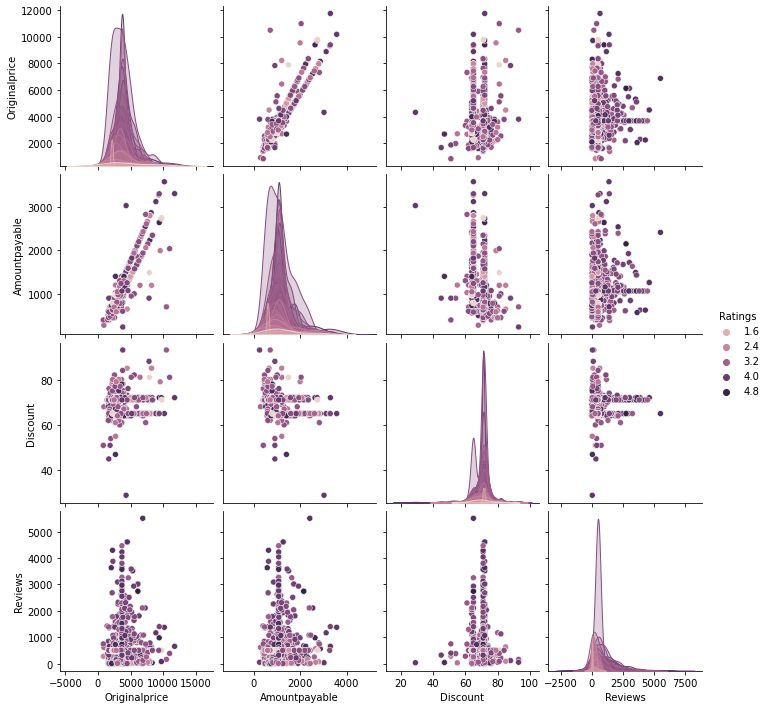

In [54]:
sns.pairplot(oyo,hue="Ratings")
plt.show()

+ the higher is the original rent the higher is the amount user have to pay there is trend which is linearly increasing from this observation we can't say that the higher is the rent the higher is the rating rating is totally independent

+ Inference
 From the whole dataset analysis, it seems that as per the rent, room quality , rating and discount , city area is affordable than hill station area.

In [55]:
oyo

,HotelName,Address,Originalprice,Amountpayable,Discount,Facilities,Ratings,Reviews,Roomquality,Location
0,OYO Home 77978 Peaceful Stay Keshav Nagar,"Mundhwa, Pune· 9.8 km",3964.0,1110.0,72.0,Parking facility Private entrance Elevator ...,3.4,1905.0,Fair,pune
1,OYO 12151 The Orchid Guest House,"Near Laxmi Mata Mandir, Pune· 5.5 km",4202.0,1177.0,71.0,Hair Dryer Parking facility Free Wi-Fi + 1...,3.1,233.0,Fair,pune
2,Flagship 11545 Hotel Gargi Executive,"On main street, Near Revenue Colony, Shivaji N...",5965.0,1670.0,72.0,Parking facility Free Wi-Fi Power backup +...,2.9,799.0,Fair,pune
3,Townhouse OAK The White Castle,"Haveli, Pune· 7.3 km",4534.0,1270.0,71.0,Reception Caretaker Power backup + 24 more,3.3,1128.0,Fair,pune
4,OYO 40836 The Guest House,"Near Vadgaon Khurd, Sinhagad Road, Pune· ...",1947.0,453.0,76.0,Parking facility Reception Free Wi-Fi + 11...,3.1,289.0,Fair,pune
...,...,...,...,...,...,...,...,...,...,...
796,Collection O 703931 Hotel bright holidays,"Mahabaleshwar, Mahabaleshwar· 5.3 km",3531.0,1236.0,65.0,AC TV TV + 3 more,3.6,509.0,,mahabaleshwar
797,OYO 76721 Hotel Mk,"Satara, Mahabaleshwar· 9.3 km",2985.0,1045.0,64.0,Full Sized Bed AC TV + 3 more,3.0,17.0,Fair,mahabaleshwar
798,OYO Townhouse 701 Hotel Bright Plaza,"Metgutad, Mahabaleshwar· 5.9 km",7437.0,2603.0,65.0,Parking facility Reception Free Wi-Fi + 18...,3.1,259.0,Fair,mahabaleshwar
799,Collection O 86603 Hotel Dream Catcher,"412803, Mahabaleshwar· 17.8 km",2798.0,586.0,79.0,Reception Ticket tour assistance Caretaker ...,2.7,509.0,Fair,mahabaleshwar


## Checking the rooms availability according to the user input

In [86]:
location = input('Enter city name: ')
rent = int(input('Enter the rent: '))
ratings=float(input('Enter the Reqiured rating'))
reviews= int(input("Enter the no of reviews sholud be:"))

oyo[(oyo['Location']==location)&(oyo['Amountpayable']<=rent)&(oyo['Ratings']<=ratings)&(oyo['Reviews']<=1000)]

Enter city name: hyderabad
Enter the rent: 1000
Enter the Reqiured rating4.0
Enter the no of reviews sholud be:500


,HotelName,Address,Originalprice,Amountpayable,Discount,Facilities,Ratings,Reviews,Roomquality,Location
117,OYO 86305 Hotel Aroma Classic,15-1-309 Feelkhana Near Acharaya Bhavan Baba R...,1834.0,599.0,67.0,Reception Public washroom Free Wi-Fi + 14 ...,3.7,481.0,Good,hyderabad
119,OYO 91284 Ambica Lodge,"Punjagutta, Hyderabad· 5.5 km",2366.0,699.0,70.0,Parking facility Free Wi-Fi Geyser + 6 more,2.9,108.0,Fair,hyderabad
122,OYO 17168 Hz Lodge,"Near Julu Khana Parking, Charminar, Hyderabad·...",2488.0,697.0,71.0,Elevator Free Wi-Fi Power backup + 2 more,3.8,96.0,Good,hyderabad
135,OYO 74184 Hotel Meredian,"TelanganaIndia500002, Hyderabad· 2.3 km",10506.0,699.0,93.0,Parking facility Reception Free Wi-Fi + 10...,3.3,168.0,Fair,hyderabad
137,OYO 68404 Sa Thirumala Residency,"Near VRK Silks, Himayatnagar, Hyderabad· ...",3192.0,894.0,71.0,Reception Security 24/7 check-in + 23 more,3.4,567.0,Fair,hyderabad
139,SPOT ON 80478 Hotel Baba Classic,"Hyderabad, Hyderabad· 5.6 km",827.0,399.0,51.0,TV Reception Public washroom + 12 more,2.4,284.0,Fair,hyderabad
140,OYO Flagship 704007 Hotel Ashoka Classic,"Hyderabad, Hyderabad· 0.4 km",1588.0,445.0,71.0,Elevator Geyser Power backup + 3 more,3.6,509.0,,hyderabad
143,SPOT ON 81775 Mohit Gokul Lodge New Room's,"Near To Secunderbad East Metro Rail Station, H...",896.0,279.0,68.0,Parking facility Reception Free Wi-Fi + 9 ...,3.0,621.0,Fair,hyderabad
144,OYO 30665 Sruan Inn,"Abhyudaya Nagar, Hyderabad· 9.7 km",2330.0,553.0,76.0,Parking facility Reception Free Wi-Fi + 14...,2.8,83.0,Fair,hyderabad
146,SPOT ON 804598 Deccan Residency,"Punjagutta, Hyderabad· 5.1 km",1588.0,599.0,62.0,AC TV,3.6,509.0,,hyderabad


In [56]:
city = input('Enter city name: ')
oyo[(oyo['Location']==city)&(oyo['Ratings']>=4) & (oyo['Reviews']>1000)&(oyo['Amountpayable']<1500)]

Enter city name: hyderabad


,HotelName,Address,Originalprice,Amountpayable,Discount,Facilities,Ratings,Reviews,Roomquality,Location
115,OYO 24204 Nav Bharath Residency,"Near Central Gurudwara Saheb, Gowliguda, Hyder...",3952.0,1107.0,71.0,Reception Free Wi-Fi Power backup + 17 more,4.1,1541.0,Very Good,hyderabad
118,Flagship 77043 Malkajgiri,"Malkajgiri, Hyderabad· 8.8 km",3017.0,845.0,71.0,Parking facility Reception Free Wi-Fi + 12...,4.0,3090.0,Very Good,hyderabad
120,OYO Townhouse 164 ESI Hospital,"Sanath Nagar, Hyderabad· 8.8 km",4494.0,1258.0,72.0,Private entrance Reception Free Wi-Fi + 11...,4.3,4606.0,Very Good,hyderabad
123,OYO 16428 Hotel Vaishnavi Inn,"Secunderabad, Hyderabad· 5.4 km",3068.0,839.0,72.0,Free Wi-Fi Power backup Card payment + 14 ...,4.0,2262.0,Very Good,hyderabad
128,OYO Home 79924 Pramod Prime Homes,"Nagole, Hyderabad· 8.1 km",2702.0,946.0,64.0,Free Wi-Fi TV AC,4.0,1506.0,Very Good,hyderabad
130,OYO Townhouse RCC Elite 265 Begumpet,"Opp To J s Babu Silks, Hyderabad· 6.1 km",5308.0,1486.0,72.0,Reception Caretaker Power backup + 23 more,4.5,3516.0,Excellent,hyderabad
133,OYO Townhouse RCC Elite 265 Begumpet,"Opp To J s Babu Silks, Hyderabad· 6.1 km",5308.0,1486.0,72.0,Reception Caretaker Power backup + 23 more,4.5,3516.0,Excellent,hyderabad
136,OYO Townhouse 164 ESI Hospital,"Sanath Nagar, Hyderabad· 8.8 km",4494.0,1258.0,72.0,Private entrance Reception Free Wi-Fi + 11...,4.3,4606.0,Very Good,hyderabad
138,Capital O 15141 Townvilla Guest House,"Near Indo US Super Speciality Hospital, Ameerp...",5265.0,1474.0,72.0,Free Wi-Fi Geyser Power backup + 8 more,4.4,1839.0,Very Good,hyderabad
141,OYO 24204 Nav Bharath Residency,"Near Central Gurudwara Saheb, Gowliguda, Hyder...",3952.0,1107.0,71.0,Reception Free Wi-Fi Power backup + 17 more,4.1,1541.0,Very Good,hyderabad


# User code

## Creating the function which accept the value from user and suggest the hotel to the user 

In [57]:
def system_recommand():
    print('Please enter the city name correctly in Capatalised format')
    city=  input('Enter city name: ')
    a = oyo.index[(oyo['Location']==city)&(oyo['Ratings']>4) & (oyo['Reviews']>1000)&(oyo['Amountpayable']<1500)]

    print('\nAll Hotels Rating is greater than 4, Reviews are greater than 1000 and Rent is less than 1500\n')
    print('*'*100)
    for i in a:
        print(oyo.iloc[i],'\n','-'*100,'\n')
        print('There is no more hotels as per requirement\n')
        print('If there is no system recomended hotel you can filter hotels as per your requirements\n')


In [58]:
def user_required():
    print("Enter the data to recommand hotels to you: ")
    city = input('City: ')
    rent = int(input('Rent (System is showing all the hotels under the entered rent): '))
    rating = float(input('Ratings: '))
    a = oyo.index[(oyo['Location']==city)&(oyo['Ratings']>rating)&(oyo['Amountpayable']<rent)].to_list()
 
    print('*'*100)
    for i in a:
        print(oyo.iloc[i],'\n','-'*100,'\n')
        print('There is no more hotels as per requirement')


In [59]:
print('Enter your choice\n1. System recommanded OYO Room\n2. User required\n')
choice = int(input('Your choice'))
if choice == 1:
    system_recommand()
elif choice == 2:
    user_required()
else:
    print('Please select proper choice ')

Enter your choice
1. System recommanded OYO Room
2. User required

Your choice1
Please enter the city name correctly in Capatalised format
Enter city name: hyderabad

All Hotels Rating is greater than 4, Reviews are greater than 1000 and Rent is less than 1500

****************************************************************************************************
HotelName                            OYO 16428 Hotel Vaishnavi Inn
Address                      Secunderabad, Hyderabad·       5.4 km
Originalprice                                               3068.0
Amountpayable                                                839.0
Discount                                                      72.0
Facilities        Free Wi-Fi  Power backup  Card payment  + 14 ...
Ratings                                                        4.0
Reviews                                                     2262.0
Roomquality                                              Very Good
Location                          

In [96]:
oyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HotelName      680 non-null    object 
 1   Address        680 non-null    object 
 2   Originalprice  680 non-null    float64
 3   Amountpayable  680 non-null    float64
 4   Discount       680 non-null    float64
 5   Facilities     680 non-null    object 
 6   Ratings        680 non-null    float64
 7   ReviewRating   680 non-null    float64
 8   Location       680 non-null    object 
 9   RoomQuality    680 non-null    object 
dtypes: float64(5), object(5)
memory usage: 53.2+ KB
